In [7]:
import requests
import pandas as pd
import numpy as np
from network import NeuralNetwork
from model.layers.dense import AdamDense, Dense
from model.activations.activation import *
from model.losses import *
import numpy as np
from influx import get_influx_data



In [8]:
def min_max_scale(column):
    return column / 10000

In [9]:
try:
    solar = pd.DataFrame(get_influx_data().raw["series"][0]["values"], columns=["time", "mean_value"])
    print("using influx")
except:
    solar = pd.read_csv(f'./data_daily.csv') 
    print("using csv")
solar["mean_value"] = solar["mean_value"] / 100
solar = solar.dropna()
solar['time'] = pd.to_datetime(solar['time'], yearfirst=True, utc=True)


url = f"https://archive-api.open-meteo.com/v1/archive?latitude=49.7751150&longitude=13.3604831&start_date={solar['time'].min().strftime('%Y-%m-%d')}&end_date={solar['time'].max().strftime('%Y-%m-%d')}&daily=weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,snowfall_water_equivalent_sum,wind_gusts_10m_mean,wind_gusts_10m_min,wind_speed_10m_mean,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max&timezone=GMT"


pred = pd.DataFrame(requests.get(url).json()["daily"])
pred["date"] = pd.to_datetime(pred["time"])
pred = pred.drop(["time"], axis=1)
pred["month"] = pred["date"].dt.month
pred["day"] = pred["date"].dt.day
pred["year"] = pred["date"].dt.year
pred = pred.drop(["date"], axis=1)
solar["day"] = solar["time"].dt.day
solar["month"] = solar["time"].dt.month
solar["year"] = solar["time"].dt.year
solar = solar.drop(["time"], axis=1)
data = pd.merge(pred, solar, on=["day", "month", "year"], how="inner")
data = data.drop(["year", "day"], axis=1)
columns_to_scale = data.columns.drop(["mean_value", "month"])  # Exclude 'mean_value' from scaling
data[columns_to_scale] = data[columns_to_scale].apply(min_max_scale)
data["month"] = np.cos((np.pi * data["month"]) / 6)
print(data["month"])

using csv
0     -8.660254e-01
1     -8.660254e-01
2     -8.660254e-01
3     -8.660254e-01
4     -8.660254e-01
           ...     
602    6.123234e-17
603    6.123234e-17
604    6.123234e-17
605    6.123234e-17
606    6.123234e-17
Name: month, Length: 607, dtype: float64


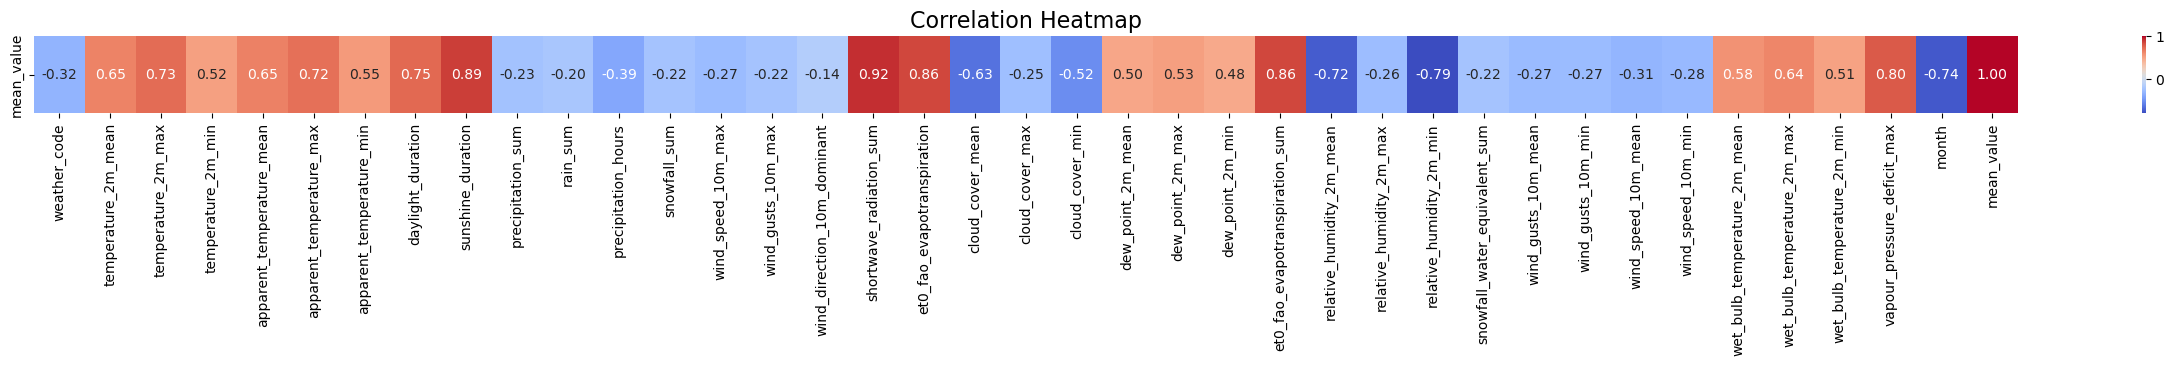

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(32, 1))
# sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
sns.heatmap(data.corr()[["mean_value"]].transpose(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

In [11]:
pd.set_option('display.max_columns', None)
data = data.dropna()

data = data.sample(frac=1)
data

,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,snowfall_water_equivalent_sum,wind_gusts_10m_mean,wind_gusts_10m_min,wind_speed_10m_mean,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max,month,mean_value
282,0.0003,0.00130,0.00186,0.00063,0.00115,0.00172,0.00043,5.465007,4.610500,0.00000,0.00000,0.0000,0.0,0.00099,0.00230,0.0040,0.002125,0.000354,0.0056,0.01,0.0001,0.00066,0.00088,0.00046,0.000354,0.0068,0.0091,0.0041,0.0,0.00129,0.00050,0.00054,0.00004,0.00093,0.00121,0.00054,0.000127,-8.660254e-01,0.195
504,0.0003,0.00056,0.00071,0.00032,0.00019,0.00031,-0.00001,2.918705,1.460634,0.00000,0.00000,0.0000,0.0,0.00177,0.00353,0.0224,0.000241,0.000064,0.0083,0.01,0.0042,0.00023,0.00039,0.00004,0.000064,0.0080,0.0097,0.0064,0.0,0.00266,0.00169,0.00134,0.00084,0.00037,0.00046,0.00025,0.000037,1.000000e+00,0.029
67,0.0003,0.00176,0.00248,0.00104,0.00175,0.00250,0.00097,4.422000,4.049376,0.00000,0.00000,0.0000,0.0,0.00118,0.00252,0.0102,0.001610,0.000297,0.0046,0.01,0.0001,0.00128,0.00151,0.00098,0.000297,0.0075,0.0096,0.0051,0.0,0.00139,0.00025,0.00069,0.00031,0.00144,0.00181,0.00099,0.000152,-1.836970e-16,0.172
106,0.0003,0.00114,0.00177,0.00064,0.00102,0.00169,0.00040,3.576979,2.301765,0.00000,0.00000,0.0000,0.0,0.00090,0.00187,0.0147,0.000744,0.000116,0.0089,0.01,0.0016,0.00083,0.00104,0.00055,0.000116,0.0082,0.0095,0.0061,0.0,0.00115,0.00065,0.00056,0.00018,0.00094,0.00131,0.00057,0.000079,5.000000e-01,0.065
118,0.0003,0.00003,0.00022,-0.00007,-0.00038,-0.00022,-0.00051,3.159362,0.000000,0.00000,0.00000,0.0000,0.0,0.00162,0.00324,0.0019,0.000180,0.000041,0.0100,0.01,0.0100,-0.00030,-0.00007,-0.00037,0.000041,0.0079,0.0085,0.0074,0.0,0.00223,0.00047,0.00106,0.00007,-0.00015,0.00005,-0.00020,0.000017,8.660254e-01,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.0003,0.00232,0.00288,0.00167,0.00254,0.00313,0.00180,5.860163,4.906313,0.00000,0.00000,0.0000,0.0,0.00151,0.00328,0.0094,0.002375,0.000483,0.0071,0.01,0.0000,0.00182,0.00210,0.00162,0.000483,0.0076,0.0100,0.0052,0.0,0.00161,0.00025,0.00068,0.00011,0.00198,0.00222,0.00163,0.000191,-1.000000e+00,0.198
336,0.0055,0.00154,0.00194,0.00128,0.00145,0.00182,0.00112,5.836841,3.032089,0.00047,0.00047,0.0018,0.0,0.00130,0.00277,0.0259,0.001905,0.000335,0.0085,0.01,0.0020,0.00105,0.00118,0.00073,0.000335,0.0074,0.0093,0.0046,0.0,0.00196,0.00112,0.00086,0.00034,0.00124,0.00133,0.00116,0.000120,-8.660254e-01,0.155
215,0.0055,0.00060,0.00117,0.00004,0.00040,0.00106,-0.00024,4.031869,2.795741,0.00024,0.00024,0.0006,0.0,0.00090,0.00238,0.0001,0.001064,0.000132,0.0055,0.01,0.0000,0.00046,0.00082,0.00004,0.000132,0.0092,0.0100,0.0073,0.0,0.00127,0.00072,0.00049,0.00004,0.00050,0.00089,0.00003,0.000037,6.123234e-17,0.071
55,0.0003,0.00190,0.00268,0.00113,0.00194,0.00280,0.00106,4.684873,4.295733,0.00000,0.00000,0.0000,0.0,0.00098,0.00137,0.0033,0.001974,0.000358,0.0012,0.01,0.0000,0.00124,0.00157,0.00097,0.000358,0.0067,0.0092,0.0044,0.0,0.00098,0.00040,0.00042,0.00007,0.00148,0.00189,0.00104,0.000198,-1.836970e-16,0.173


In [12]:


# data["month"] = (data['month']).apply(lambda x: abs(1 - abs(x - 6) / 5))


y = data["mean_value"]
X = data.drop(["mean_value"], axis=1)
X = X.to_numpy()
X =np.reshape(X, (X.shape[0],X.shape[1], 1))
y = np.reshape(y.to_numpy(), (y.shape[0], 1))
# network = [Dense(17,32), Softplus(), AdamDense(32, 64),  NormalizedTanh(),  AdamDense(64, 128),  Tanh(),  AdamDense(128, 1), Softplus()]
network = [AdamDense(38,64), Softplus(), AdamDense(64, 128),  Tanh(),  AdamDense(128, 32), NormalizedTanh(),  AdamDense(32, 16), Tanh(),  AdamDense(16, 1), Softplus()]
# network = [AdamDense(37,32), Softplus(), AdamDense(32, 16),  Tanh(),  AdamDense(16, 8), NormalizedTanh(),  AdamDense(8, 1), Softplus()]
n = NeuralNetwork(network)

trained_n = n.train(mse, mse_prime, X, y, epochs=2000, learning_rate=0.00001, verbose=False)


Complete Validation on 10/2000 epoch, actual=809.0, prediction=0.0, miss=809.0, percentage=0.0%, valid_error=1.903947, error=0.014415073113207541
Complete Validation on 20/2000 epoch, actual=809.0, prediction=0.0, miss=809.0, percentage=0.0%, valid_error=1.903947, error=0.014415073113207541


KeyboardInterrupt: 

7

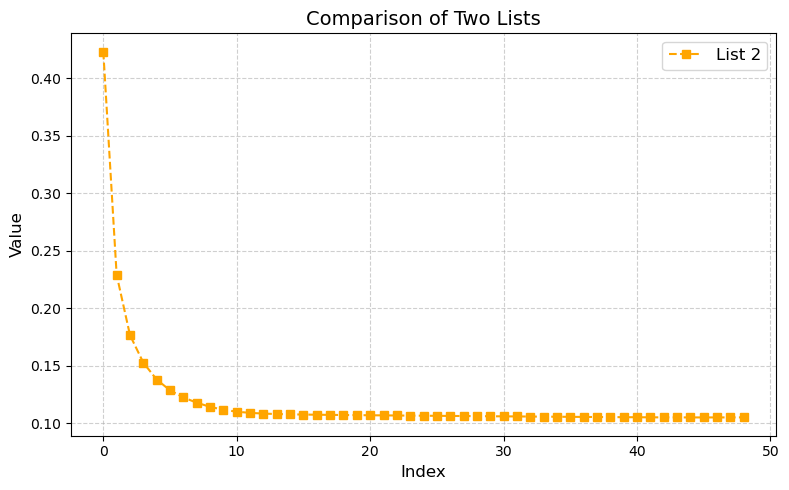

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(8, 5))
# plt.plot([n.error_rate[i] for i in range(len(n.error_rate)) if i == 0 or i % 10 == 0], label='List 1', marker='o', linestyle='-', color='blue')
plt.plot(n.real_error[2:], label='List 2', marker='s', linestyle='--', color='orange')

# Add title and labels
plt.title('Comparison of Two Lists', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
from daily import train
import inspect
lines = inspect.getsource(train)
print(lines)

def train():
    try:
        solar = pd.DataFrame(get_influx_data().raw["series"][0]["values"], columns=["time", "mean_value"])
        print("using influx", flush=True)
    except:
        solar = pd.read_csv('./data_daily.csv') 
        print("using csv", flush=True)
    solar["mean_value"] = solar["mean_value"] / 100
    solar = solar.dropna()
    solar['time'] = pd.to_datetime(solar['time'], yearfirst=True, utc=True)

    url = f"https://archive-api.open-meteo.com/v1/archive?latitude=49.7751150&longitude=13.3604831&start_date={solar['time'].min().strftime('%Y-%m-%d')}&end_date={solar['time'].max().strftime('%Y-%m-%d')}&daily=weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cl

In [14]:
train()

using csv


/mnt/d/Projects/Hasp/solar_prediction/app/model/activations/activation.py:100: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Complete Validation on 10/2000 epoch, actual=905.0, prediction=0.0, miss=905.0, percentage=0.0%, valid_error=2.2910990000000004, error=0.013501978773584897


KeyboardInterrupt: 